<a href="https://colab.research.google.com/github/zi2p/M-machine-learning/blob/main/M33001_%D0%9F%D0%B8%D1%81%D0%B0%D1%80%D0%B5%D0%B2%D0%B0_lab7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = {0: 'T-shirt/top', \
           1: 'Trouser', \
           2: 'Pullover', \
           3: 'Dress', \
           4: 'Coat', \
           5: 'Sandal', \
           6: 'Shirt', \
           7: 'Sneaker', \
           8: 'Bag', \
           9: 'Ankle boot'}

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [ ]:
import pandas as pd
from tqdm import notebook

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

Сколько картинок:

In [ ]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
testset.data.shape

torch.Size([10000, 28, 28])

Равномерно ли распределено количество объектов разных классов в train/test датасете

In [ ]:
pd_trainset = pd.DataFrame(trainset.targets.numpy())

for i in range(10):
  print('Number', i, ':', (pd_trainset == i).sum())

Number 0 : 0    6000
dtype: int64
Number 1 : 0    6000
dtype: int64
Number 2 : 0    6000
dtype: int64
Number 3 : 0    6000
dtype: int64
Number 4 : 0    6000
dtype: int64
Number 5 : 0    6000
dtype: int64
Number 6 : 0    6000
dtype: int64
Number 7 : 0    6000
dtype: int64
Number 8 : 0    6000
dtype: int64
Number 9 : 0    6000
dtype: int64


In [ ]:
pd_testset = pd.DataFrame(testset.targets.numpy())
for i in range(10):
  print('Number', i, ':', (pd_testset == i).sum())

Number 0 : 0    1000
dtype: int64
Number 1 : 0    1000
dtype: int64
Number 2 : 0    1000
dtype: int64
Number 3 : 0    1000
dtype: int64
Number 4 : 0    1000
dtype: int64
Number 5 : 0    1000
dtype: int64
Number 6 : 0    1000
dtype: int64
Number 7 : 0    1000
dtype: int64
Number 8 : 0    1000
dtype: int64
Number 9 : 0    1000
dtype: int64


Вывод картинок:

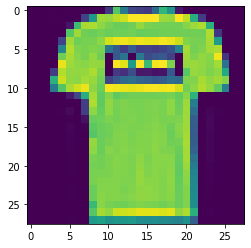

In [ ]:
plt.imshow(trainset.data[1])

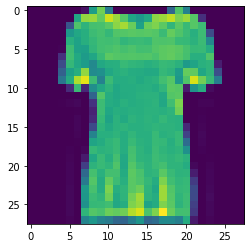

In [ ]:
plt.imshow(trainset.data[10])

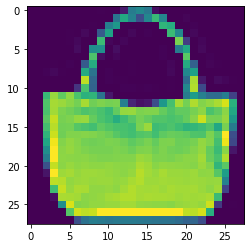

In [ ]:
plt.imshow(trainset.data[100])

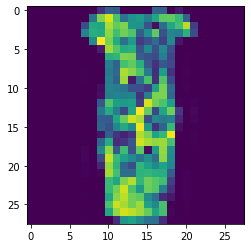

In [ ]:
plt.imshow(testset.data[100])

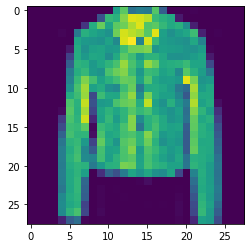

In [ ]:
plt.imshow(testset.data[10])

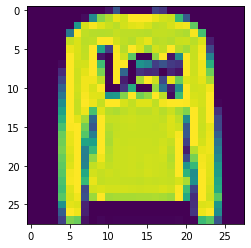

In [ ]:
plt.imshow(testset.data[1])